In [60]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import ast
import numpy as np
from nltk.stem import WordNetLemmatizer



import matplotlib.pyplot as plt


In [61]:
# nltk.download('stopwords')
# nltk.download('punkt_tab')  
# nltk.download('punkt') 
# nltk.download('averaged_perceptron_tagger_eng')  # version demandée par ton error
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')
# nltk.download("wordnet")
# nltk.download("omw-1.4")
# nltk.download("punkt")
# nltk.download("averaged_perceptron_tagger")

 


In [62]:
text_df = pd.read_csv(r'Dataset_projet_pretraitement_textes_images\Flipkart\flipkart_com-ecommerce_sample_1050.csv')
text_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


## Pré-traitement du texte

In [63]:
#Regex pour ne garder que les caractères alphanumérique
# text_df['description_nettoyee'] = text_df['description'].str.replace(r'[^A-Za-z0-9]', ' ', regex=True).str.lower()
# text_df.head()

In [64]:
# text_df['tokens'] = text_df['description_nettoyee'].apply(word_tokenize)
# text_df['name_tokens'] = text_df['product_name'].apply(word_tokenize)
# text_df.head()

In [65]:
# text_df.dtypes

### Analyse et normalisation des données

In [66]:
# #Nombre total de mot par description
# text_df['total_words'] = text_df['tokens'].apply(len)

# #Nombre de mots uniques par description
# text_df['unique_words'] = text_df['tokens'].apply(lambda x: len(set(x)))

# text_df.describe()

In [67]:
# #Nombre de mots uniques par description
# text_df['unique_words'] = text_df['tokens'].apply(lambda x: len(set(x)))

In [68]:
# plt.figure(figsize=(18,6))

# x = range(len(text_df))

# plt.bar(x, text_df['total_words'], color='orange', alpha=0.2, label='total')
# plt.bar(x, text_df['unique_words'], color='orange', alpha=1, label='unique')

# plt.xlabel('Index du document')
# plt.ylabel('Nombre de mots')
# plt.title('Nombre total vs unique de mots par description')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [69]:
# text_df['brand_str'] = text_df['brand'].astype(str)
# text_df_cat = text_df.groupby('brand_str')[['total_words', 'unique_words']].mean().reset_index()
# text_df_cat = text_df_cat.sort_values(by='total_words', ascending=False).reset_index(drop=True)

# plt.figure(figsize=(18,6))

# x = range(len(text_df_cat))

# plt.bar(x, text_df_cat['total_words'], color='orange', alpha=0.2, label='total')
# plt.bar(x, text_df_cat['unique_words'], color='orange', alpha=1, label='unique')

# plt.xlabel("Index de la catégorie d'article")
# plt.ylabel('Nombre de mots')
# plt.title('Nombre total vs unique de mots par description')
# plt.legend()
# plt.tight_layout()
# plt.show()


In [70]:
# text_df_cat.head(10)

In [71]:
# all_words = [word for sublist in text_df['tokens'] for word in sublist]
# word_counts = Counter(all_words)
# most_common_words = word_counts.most_common(10)
# print(most_common_words)

In [72]:
# name_words = [word for sublist in text_df['name_tokens'] for word in sublist]
# name_word_counts = Counter(name_words)
# most_common_words_name = name_word_counts.most_common(10)
# print(most_common_words_name)

Le soucis rencontré ici est que les mots les plus courants vont être ceux qui donnent le moins de signification comme "of", "for", "the", "and"... Nous allons devoir les enelver pour poursuivre l'analyse. 

In [73]:
# stop_words = set(stopwords.words('english'))
# text_df['tokens_wo'] = text_df['tokens'].apply(lambda tokens: [w for w in tokens if w.lower() not in stop_words])
# text_df['name_tokens_wo'] = text_df['name_tokens'].apply(lambda tokens: [w for w in tokens if w.lower() not in stop_words])

# all_words_sw = [word for sublist in text_df['tokens_wo'] for word in sublist]
# word_counts_sw = Counter(all_words_sw)
# most_common_words_sw = word_counts_sw.most_common(10)
# print(most_common_words_sw)


In [74]:
# #Nombre total de mot par description
# text_df['total_meaning_words'] = text_df['tokens_wo'].apply(len)

# #Nombre de mots uniques par description
# text_df['unique_words_wo'] = text_df['tokens_wo'].apply(lambda x: len(set(x)))

# text_df.describe()

In [75]:
# Pour améliorer le lemmatization, sinon tous les mots sont considérés comme des noms communs 
# et la lemmatization est moins efficace
def get_wordnet_pos(word):
    # POS tag du mot (par exemple "NN", "VB", "JJ", ...)
    tag = nltk.pos_tag([word])[0][1][0].upper()
    
    # Correspondance NLTK → WordNet
    tag_dict = {
        "J": wordnet.ADJ,  # adjective
        "N": wordnet.NOUN, # noun
        "V": wordnet.VERB, # verb
        "R": wordnet.ADV   # adverb
    }
    
    # Retourne le tag wordnet (ou noun par défaut)
    return tag_dict.get(tag, wordnet.NOUN)

In [76]:
# lemmatizer = WordNetLemmatizer()

# text_df['tokens_lemma'] = text_df['tokens_wo'].apply(
#     lambda tokens: [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
# )
# text_df['name_tokens_lemma'] = text_df['name_tokens_wo'].apply(
#     lambda tokens: [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
# )

# text_df[['product_name','name_tokens_lemma','tokens_wo', 'tokens_lemma']].head(10)


In [77]:
# all_words_clean = [word for sublist in text_df['tokens_lemma'] for word in sublist]
# word_counts_clean = Counter(all_words_clean)
# most_common_words_clean = word_counts_clean.most_common(10)
# print(most_common_words_clean)

#### En une seule fonction

In [78]:
#Création d'une fonction pour faire ce traitement en une fois
def traitement_texte(text):
    # Convertir en minuscules et ne garder que les caractères alphanumériques
    text = re.sub(r'[^A-Za-z0-9]', ' ', text).lower()

    # Tokenisation
    tokens = word_tokenize(text)
    
    # Suppression des stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Lemmatisation
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    return lemmatized_tokens

In [79]:
#Application de la fonction
text_df['text_total'] = text_df['product_name'] + text_df['description']
print(f"Avant le pré-processing : {text_df['text_total'][10]}")
text_df['processed_total'] = text_df['text_total'].apply(lambda tokens: traitement_texte(tokens))
print(f"Après le pré-processing : {text_df['processed_total'][10]}")


all_clean = [word for sublist in text_df['processed_total'] for word in sublist]
all_counts_clean = Counter(all_clean)
most_common_words_clean_all = all_counts_clean.most_common(10)
print(f"Mots les plus courants et leur nombre d'apparition dans la base de données : {most_common_words_clean_all}")

Avant le pré-processing : Calibro SW-125 Analog-Digital Watch  - For Men, BoysCalibro SW-125 Analog-Digital Watch  - For Men, Boys
                         Price: Rs. 699
				
			CALIBRO presents MTG Black Dial Round Watch. This is a fashionable watch from MTG that adds to your style statement. This brand is known for its usage of quality material in making appealing watches. It understands the needs of youth so well that it is able to present wide range of watches to its customers. The variety in design, style and youthful approach is very well executed by this brand. Get one and see how brilliantly it leads other brands in style, finish and everything else that matters.
CALIBRO presents MTG Black Dial Round Watch. This is a fashionable watch from MTG that adds to your style statement. This brand is known for its usage of quality material in making appealing watches. It understands the needs of youth so well that it is able to present wide range of watches to its customers. The variet

Le mot le plus commun est "r", c'est intriguant mais il y a peut-être une logique métier. 

## Application de la technique Bag of words

### Seulement sur la description

In [80]:
# #Il faut des textes et pas des listes pour utiliser la technique Bag of words
# text_df['cleaned_description'] = text_df['tokens_lemma'].apply(lambda tokens: ' '.join(tokens))
# text_df['cleaned_product_name'] = text_df['name_tokens_lemma'].apply(lambda tokens: ' '.join(tokens))

# text_df.dtypes

In [81]:
# tfidf = TfidfVectorizer()
# bow_matrix = tfidf.fit_transform(text_df['cleaned_description'])
# bow_df = pd.DataFrame(bow_matrix.toarray(), columns=tfidf.get_feature_names_out())
# bow_df.head()


In [82]:
# pca = PCA(n_components=0.99)
# pca_result = pca.fit_transform(bow_df)
# print("Variance expliquée :", pca.explained_variance_ratio_)
# print("Variance expliquée cumulée :", pca.explained_variance_ratio_.sum())

In [83]:
# tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
# tsne_result = tsne.fit_transform(pca_result)

# text_df['TSNE1'] = tsne_result[:, 0]
# text_df['TSNE2'] = tsne_result[:, 1]

# plt.figure(figsize=(8,6))
# plt.scatter(text_df['TSNE1'], text_df['TSNE2'], c='purple', alpha=0.5)
# plt.title('t-SNE des documents (Bag-of-Words)')
# plt.xlabel('t-SNE1')
# plt.ylabel('t-SNE2')
# plt.show()

In [84]:
# #Je vais essayer de former des clusters cohérents avec KMeans sur cette représentation t-SNE
# kmeans = KMeans(n_clusters=7, random_state=42)
# kmeans.fit(tsne_result)
# text_df['cluster'] = kmeans.labels_

In [85]:
# plt.figure(figsize=(8,6))
# plt.scatter(text_df['TSNE1'], text_df['TSNE2'], c=text_df['cluster'], alpha=0.5)
# plt.title('t-SNE des documents (Bag-of-Words)')
# plt.xlabel('t-SNE1')
# plt.ylabel('t-SNE2')
# plt.show()

In [86]:
# for val in text_df['product_category_tree'].head():
#     print(repr(val), type(val))

In [87]:
# def _normalize_cat_str(x):
#     if pd.isna(x):
#         return ""
#     if isinstance(x, list):
#         s = " ".join(map(str, x))
#     else:
#         s = str(x).strip()
#         if s.startswith("[") and s.endswith("]"):
#             try:
#                 parsed = ast.literal_eval(s)
#                 if isinstance(parsed, list):
#                     s = " ".join(map(str, parsed))
#             except Exception:
#                 pass
#     s = s.replace("&gt;", ">>").replace("&amp;", "&")
#     return s.strip(" []'\"")

# def _split_levels(s):
#     if not s:
#         return []
#     if ">>" in s:
#         parts = [p.strip() for p in s.split(">>") if p.strip()]
#     else:
#         parts = [p.strip() for p in re.split(r'\s*>\s*', s) if p.strip()]
#     return parts

# def extract_first_level(x):
#     parts = _split_levels(_normalize_cat_str(x))
#     return parts[0] if parts else np.nan

# text_df['categories'] = text_df['product_category_tree'].apply(extract_first_level)

# text_df[['product_category_tree', 'categories']].head()

In [88]:
# text_df['cat_code'] = text_df['categories'].astype('category').cat.codes

# plt.figure(figsize=(8,6))
# plt.scatter(text_df['TSNE1'], text_df['TSNE2'], c=text_df['cat_code'], alpha=0.5)
# plt.title('t-SNE des documents (Bag-of-Words)')
# plt.xlabel('t-SNE1')
# plt.ylabel('t-SNE2')
# plt.show()

### Application de la technique Bag of words sur la description et le nom de produit

In [89]:
# Je vais exclure les adverbes et adjectifs pour ne garder que les mots avec le plus de signification.
def filter_pos(tokens):
    pos_tags = nltk.pos_tag(tokens)
    filtered_tokens = [word for word, pos in pos_tags if pos not in ('JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS')]
    return filtered_tokens

text_df['token_total_filtered'] = text_df['processed_total'].apply(filter_pos)
text_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,text_total,processed_total,token_total_filtered
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Elegance Polyester Multicolor Abstract Eyelet ...,"[elegance, polyester, multicolor, abstract, ey...","[elegance, polyester, multicolor, eyelet, door..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Sathiyas Cotton Bath TowelSpecifications of Sa...,"[sathiyas, cotton, bath, towelspecifications, ...","[cotton, bath, towelspecifications, sathiyas, ..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Eurospa Cotton Terry Face Towel SetKey Feature...,"[eurospa, cotton, terry, face, towel, setkey, ...","[cotton, terry, face, towel, feature, eurospa,..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",SANTOSH ROYAL FASHION Cotton Printed King size...,"[santosh, royal, fashion, cotton, print, king,...","[fashion, cotton, print, king, size, feature, ..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Jaipur Print Cotton Floral King sized Double B...,"[jaipur, print, cotton, floral, king, size, do...","[jaipur, print, cotton, king, size, feature, j..."


In [90]:
def _normalize_cat_str(x):
    if pd.isna(x):
        return ""
    if isinstance(x, list):
        s = " ".join(map(str, x))
    else:
        s = str(x).strip()
        if s.startswith("[") and s.endswith("]"):
            try:
                parsed = ast.literal_eval(s)
                if isinstance(parsed, list):
                    s = " ".join(map(str, parsed))
            except Exception:
                pass
    s = s.replace("&gt;", ">>").replace("&amp;", "&")
    return s.strip(" []'\"")

def _split_levels(s):
    if not s:
        return []
    if ">>" in s:
        parts = [p.strip() for p in s.split(">>") if p.strip()]
    else:
        parts = [p.strip() for p in re.split(r'\s*>\s*', s) if p.strip()]
    return parts

def extract_first_level(x):
    parts = _split_levels(_normalize_cat_str(x))
    return parts[0] if parts else np.nan

text_df['categories'] = text_df['product_category_tree'].apply(extract_first_level)

text_df[['product_category_tree', 'categories']].head()

,product_category_tree,categories
0,"[""Home Furnishing >> Curtains & Accessories >>...",Home Furnishing
1,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care
2,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Baby Care
3,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Home Furnishing
4,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Home Furnishing


In [91]:
text_df['cleaned_total'] = text_df['token_total_filtered'].apply(lambda tokens: ' '.join(tokens))
text_df['cat_code'] = text_df['categories'].astype('category').cat.codes

text_df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
text_total                  object
processed_total             object
token_total_filtered        object
categories                  object
cleaned_total               object
cat_code                      int8
dtype: object

In [92]:
tfidf_tot = TfidfVectorizer()
bow_matrix_tot = tfidf_tot.fit_transform(text_df['cleaned_total'])
bow_df_tot = pd.DataFrame(bow_matrix_tot.toarray(), columns=tfidf_tot.get_feature_names_out())
bow_df_tot.head()


,00,000,001,0021,004,005,006,008,0083,01,...,zikrak,zinc,zingalalaa,zip,zipexterior,zipper,zone,zoom,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
pca_tot = PCA(n_components=0.99)
pca_result_tot = pca_tot.fit_transform(bow_df_tot)
print("Variance expliquée :", pca_tot.explained_variance_ratio_)
print("Variance expliquée cumulée :", pca_tot.explained_variance_ratio_.sum())

Variance expliquée : [0.02588994 0.02152624 0.01864507 0.01424338 0.01289479 0.01082717
 0.01076405 0.00984698 0.00869364 0.00822847 0.00805863 0.00736411
 0.00699742 0.00673746 0.00652804 0.00645024 0.00628641 0.00582334
 0.00577892 0.00530774 0.00520301 0.00500645 0.00477608 0.00469673
 0.00452648 0.00448968 0.00435784 0.00426332 0.00407846 0.00403807
 0.00391221 0.00382572 0.0037174  0.00364445 0.00354872 0.00350462
 0.0033878  0.00333156 0.00329111 0.0032239  0.00317769 0.00316914
 0.00311241 0.00308674 0.00306811 0.00304061 0.00295583 0.0029134
 0.00286905 0.00285153 0.00284237 0.00281102 0.00280201 0.0027724
 0.00272012 0.00270884 0.0026677  0.00265511 0.00262581 0.00258622
 0.00257502 0.00256985 0.00252209 0.0025008  0.00246306 0.00243049
 0.00240563 0.00239923 0.00236537 0.0023476  0.00232235 0.0023042
 0.00229201 0.00227704 0.00226345 0.00225433 0.00223911 0.00222613
 0.00219593 0.00217055 0.00216035 0.00213223 0.00211169 0.00209459
 0.00207967 0.00207298 0.00204339 0.00203271

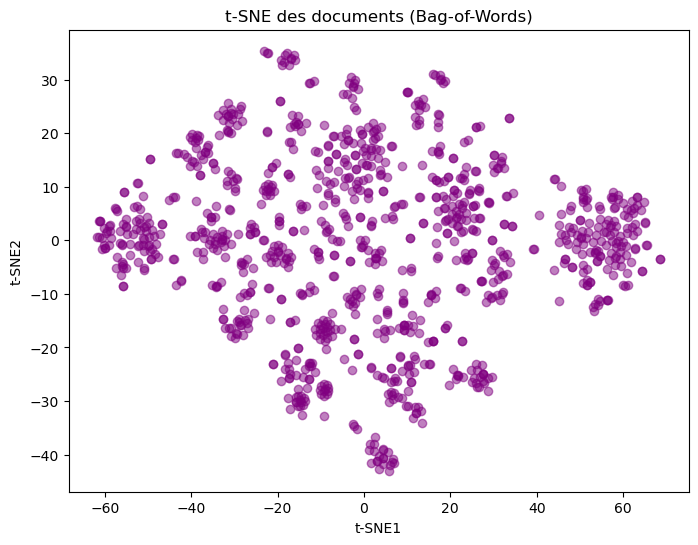

In [94]:
tsne_tot = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
tsne_result_tot = tsne_tot.fit_transform(pca_result_tot)

text_df['TSNE1_tot'] = tsne_result_tot[:, 0]
text_df['TSNE2_tot'] = tsne_result_tot[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_tot'], text_df['TSNE2_tot'], c='purple', alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [95]:
#Je vais essayer de former des clusters cohérents avec KMeans sur cette représentation t-SNE
kmeans_tot = KMeans(n_clusters=7, random_state=42)
kmeans_tot.fit(tsne_result_tot)
text_df['cluster_tot'] = kmeans_tot.labels_

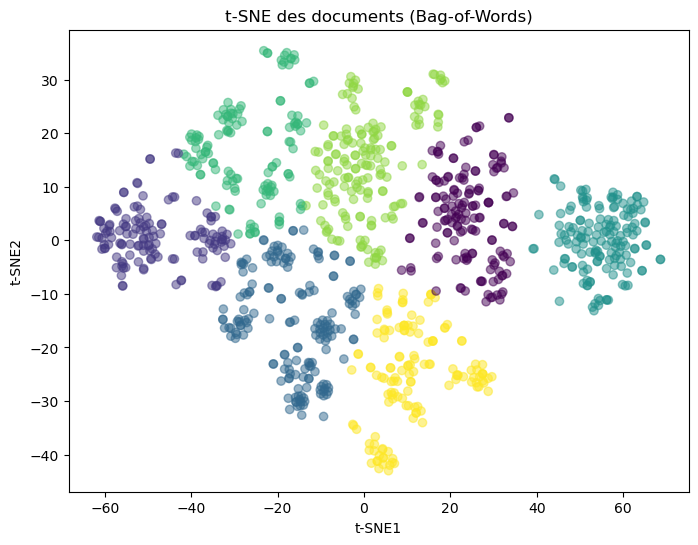

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_tot'], text_df['TSNE2_tot'], c=text_df['cluster_tot'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

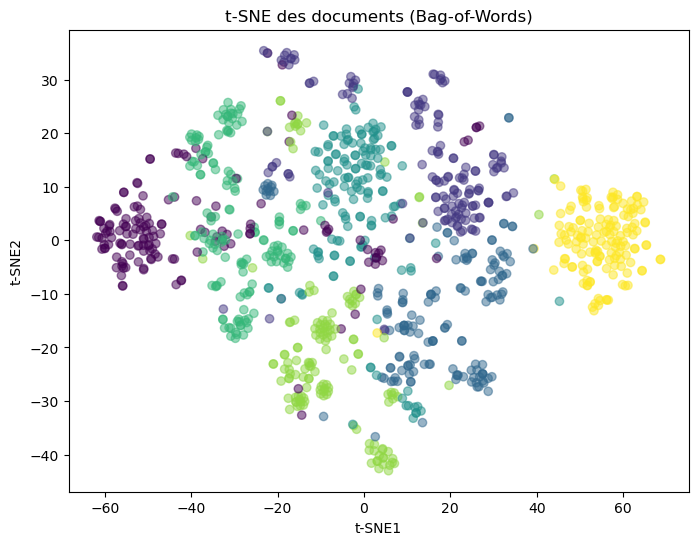

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_tot'], text_df['TSNE2_tot'], c=text_df['cat_code'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

### Test ARI sur le Tf-idf

In [98]:
from sklearn.metrics import adjusted_rand_score

In [99]:
ari = adjusted_rand_score(text_df['cluster_tot'], text_df['cat_code'])
print(f"ARI = {ari:.3f}")

ARI = 0.457


## Méthodes de text embedding

### Word2Vec

In [100]:
# %pip install gensim
from gensim.models import Word2Vec


In [102]:
word2vec_model = Word2Vec(text_df['processed_total'], vector_size=100, window=3, min_count=1, sg=1)

def sentence_vector(tokens, model):
    tokens = [t for t in tokens if t in model.wv]
    if not tokens:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[t] for t in tokens], axis=0)

# appliquer à tout le dataframe
text_df["w2v_embedding"] = text_df["processed_total"].apply(lambda tokens: sentence_vector(tokens, word2vec_model))
#On obtient une colonne avec une liste de score pour chaque mot or il nous faut un tableau pour pouvoir réaliser les étapes suivantes


In [103]:
word2vec_df = pd.DataFrame(text_df["w2v_embedding"].to_list())
word2vec_df.columns = [f"dim_{i+1}" for i in range(word2vec_model.vector_size)]
word2vec_df.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_91,dim_92,dim_93,dim_94,dim_95,dim_96,dim_97,dim_98,dim_99,dim_100
0,-0.028200,0.045404,-0.128358,-0.165600,-0.038653,-0.346624,0.235227,0.297626,0.057062,-0.064510,...,0.285369,-0.095606,0.107481,0.275956,0.121555,-0.083827,0.163187,-0.133535,-0.011608,-0.086315
1,0.011739,0.077038,-0.211536,-0.340914,-0.025670,-0.514045,0.184180,0.411867,0.105088,-0.139451,...,0.388174,-0.192471,0.156173,0.215359,0.189382,-0.076122,0.173932,-0.180974,-0.148955,-0.214835
2,0.005672,0.104663,-0.165354,-0.240433,0.014838,-0.442196,0.195709,0.392420,0.056374,-0.109376,...,0.334422,-0.153505,0.117371,0.216268,0.186695,-0.045636,0.198054,-0.125924,-0.083957,-0.184155
3,-0.088815,0.024946,-0.196665,-0.242980,0.024808,-0.432562,0.188135,0.418244,0.077968,-0.073568,...,0.408009,-0.042255,0.168792,0.270119,0.208428,-0.052417,0.125219,-0.203023,-0.126574,-0.199836
4,-0.091244,0.034838,-0.157931,-0.229154,0.022539,-0.413657,0.210206,0.423280,0.062960,-0.065863,...,0.392954,-0.029738,0.154171,0.275647,0.208262,-0.043443,0.136861,-0.196863,-0.105350,-0.192425


In [104]:
pca_w2v = PCA(n_components=0.99)
pca_result_w2v = pca_w2v.fit_transform(word2vec_df)
print("Variance expliquée :", pca_w2v.explained_variance_ratio_)
print("Variance expliquée cumulée :", pca_w2v.explained_variance_ratio_.sum())

Variance expliquée : [0.60774297 0.1505878  0.0843823  0.05340483 0.02566537 0.01859785
 0.0156463  0.01085163 0.00724086 0.00651551 0.0046792  0.00381703
 0.00253205]
Variance expliquée cumulée : 0.99166375


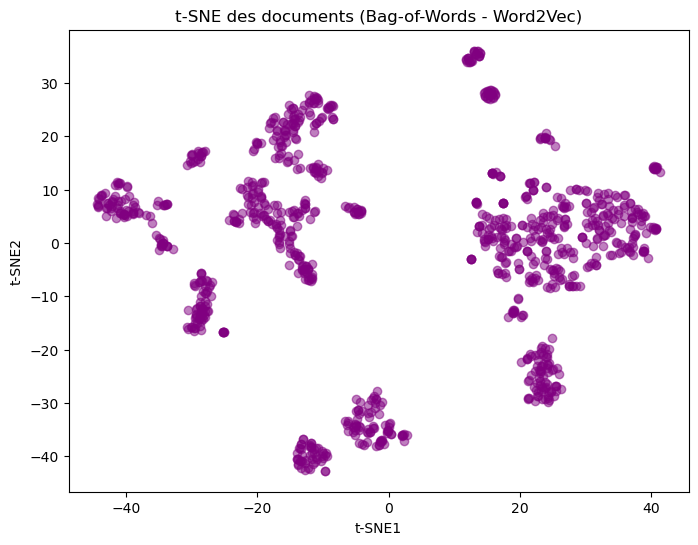

In [105]:
tsne_w2v = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
tsne_result_w2v = tsne_w2v.fit_transform(pca_result_w2v)

text_df['TSNE1_w2v'] = tsne_result_w2v[:, 0]
text_df['TSNE2_w2v'] = tsne_result_w2v[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_w2v'], text_df['TSNE2_w2v'], c='purple', alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - Word2Vec)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

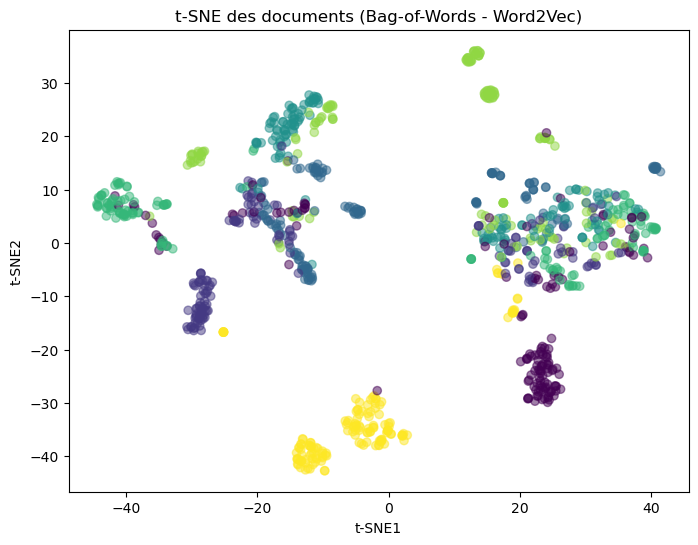

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_w2v'], text_df['TSNE2_w2v'], c=text_df['cat_code'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - Word2Vec)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

Les couleurs représentent les catégories de produits et il ne semble pas y avoir de groupes distincts avec cette méthode de text embedding.

In [107]:
#Je vais essayer de former des clusters cohérents avec KMeans sur cette représentation t-SNE
kmeans_w2v = KMeans(n_clusters=7, random_state=42)
kmeans_w2v.fit(tsne_result_w2v)
text_df['cluster_w2v'] = kmeans_w2v.labels_

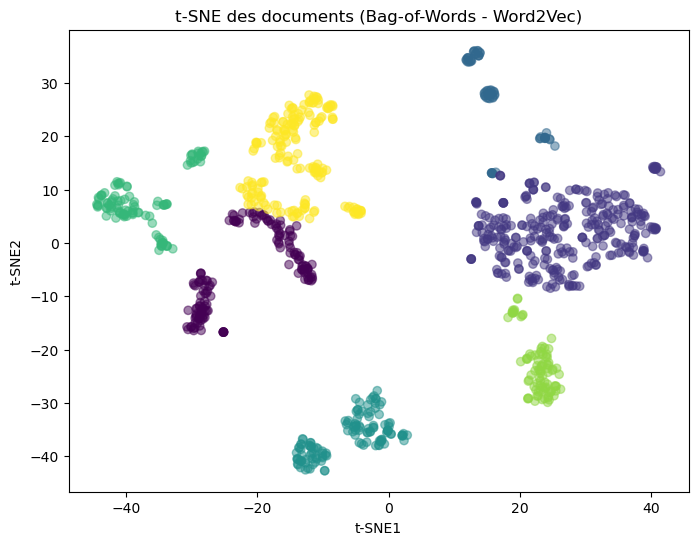

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_w2v'], text_df['TSNE2_w2v'], c=text_df['cluster_w2v'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - Word2Vec)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [109]:
ari_w2v = adjusted_rand_score(text_df['cluster_w2v'], text_df['cat_code'])
print(f"ARI = {ari_w2v:.3f}")

ARI = 0.260


Cet embedding semble moins bien fonctionner que le Tf-idf. Le score ARI faible confirme que les clusters formés via le Kmeans ne correspondent pas aux vraies catégories de produits. 

### BERT

In [110]:
# %pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer


In [111]:
bert_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
#Pour charger le modèle pré-entrainé

In [113]:
#L'appliquer sur nos textes
bert_embeddings = bert_model.encode(text_df['processed_total'], show_progress_bar=True)

Batches:   0%|          | 0/33 [00:00<?, ?it/s]

In [114]:
bert_df = pd.DataFrame(bert_embeddings)
bert_df.columns = [f"dim_{i+1}" for i in range(bert_df.shape[1])]
bert_df.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_375,dim_376,dim_377,dim_378,dim_379,dim_380,dim_381,dim_382,dim_383,dim_384
0,-0.051938,0.049887,0.060791,0.049155,-0.032489,-0.051911,0.104647,-0.057178,-0.077164,0.034329,...,0.011387,-0.011416,-0.068647,0.045410,-0.014155,0.032684,0.063432,-0.040208,0.113230,0.002247
1,-0.069005,-0.008625,-0.077929,0.039497,-0.021182,0.033183,0.050420,-0.013902,-0.077097,0.066870,...,0.010157,-0.047350,-0.012968,0.038122,-0.032252,0.072483,0.032107,-0.055129,0.029103,0.021209
2,-0.085007,0.055424,-0.085233,0.007166,0.022037,-0.027687,0.082694,0.029298,-0.035322,-0.000666,...,0.046297,-0.015369,-0.078519,0.022916,0.016117,0.037352,-0.010650,-0.046734,0.026582,-0.010478
3,-0.042912,0.035863,-0.027803,0.008482,0.030142,0.018533,0.092808,0.039113,0.026108,-0.007370,...,0.047949,0.022217,-0.040427,-0.004003,-0.069209,0.016645,0.080517,-0.072904,-0.021892,-0.054902
4,-0.032729,0.035233,-0.068099,0.110168,-0.102322,-0.010131,-0.033632,-0.024046,-0.125872,-0.093231,...,0.010872,0.003548,-0.001028,-0.043398,0.028446,0.087856,0.120812,-0.013948,0.073384,0.000417


In [115]:
pca_bert = PCA(n_components=0.99)
pca_result_bert = pca_bert.fit_transform(bert_df)
print("Variance expliquée :", pca_bert.explained_variance_ratio_)
print("Variance expliquée cumulée :", pca_bert.explained_variance_ratio_.sum())

Variance expliquée : [0.05200427 0.03037382 0.02933528 0.02484268 0.02428942 0.02359295
 0.02194545 0.01987105 0.01856692 0.01756065 0.01643513 0.0155867
 0.01451114 0.0138507  0.01352159 0.01282189 0.01209212 0.01147054
 0.01108332 0.01076033 0.0104581  0.01030253 0.00997005 0.00972883
 0.00920236 0.0090661  0.00881675 0.00840076 0.00810738 0.00800753
 0.00797645 0.00791852 0.00781728 0.00757994 0.00744926 0.0074174
 0.00736548 0.00720574 0.0069901  0.00676626 0.00671545 0.0065092
 0.00644526 0.00626264 0.00613246 0.00605651 0.00595606 0.00569933
 0.00567096 0.00556249 0.00544389 0.00540272 0.00528815 0.00521961
 0.00515332 0.00509395 0.00497732 0.00496076 0.00486786 0.00481513
 0.00473586 0.00461352 0.00459477 0.00453184 0.00437734 0.00430533
 0.00424601 0.00421771 0.00418928 0.00414598 0.00404109 0.00393486
 0.00391267 0.00383164 0.00378487 0.0037502  0.00365388 0.00362263
 0.00358305 0.00355382 0.00350178 0.00342805 0.00335075 0.00327557
 0.00325286 0.00321529 0.00316844 0.00313378

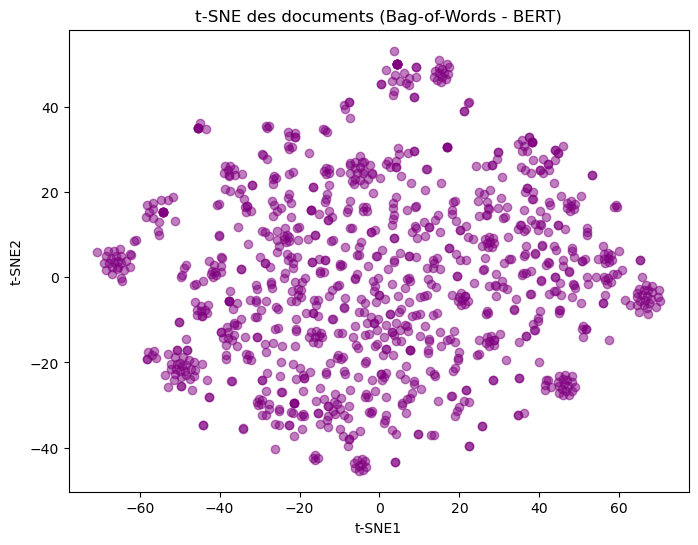

In [116]:
tsne_bert = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
tsne_result_bert = tsne_bert.fit_transform(pca_result_bert)

text_df['TSNE1_bert'] = tsne_result_bert[:, 0]
text_df['TSNE2_bert'] = tsne_result_bert[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_bert'], text_df['TSNE2_bert'], c='purple', alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - BERT)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

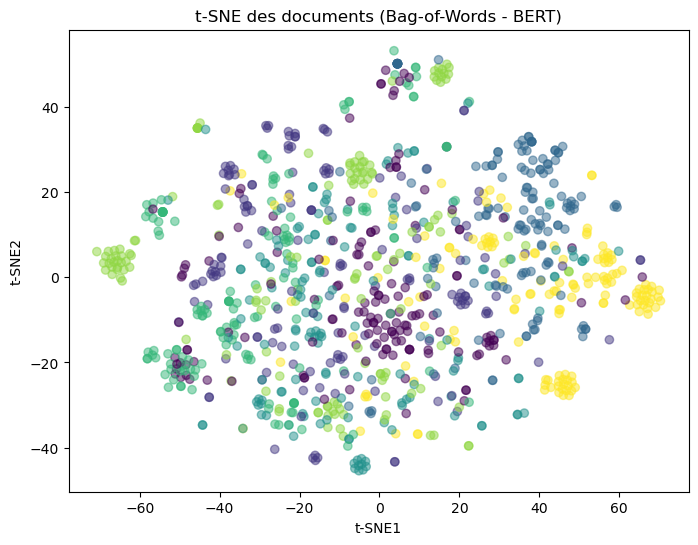

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_bert'], text_df['TSNE2_bert'], c=text_df['cat_code'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - BERT)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

De nouveau, les catégories ne sont pas vraiment individualisées.

In [118]:
#Je vais essayer de former des clusters cohérents avec KMeans sur cette représentation t-SNE
kmeans_bert = KMeans(n_clusters=7, random_state=42)
kmeans_bert.fit(tsne_result_bert)
text_df['cluster_bert'] = kmeans_bert.labels_

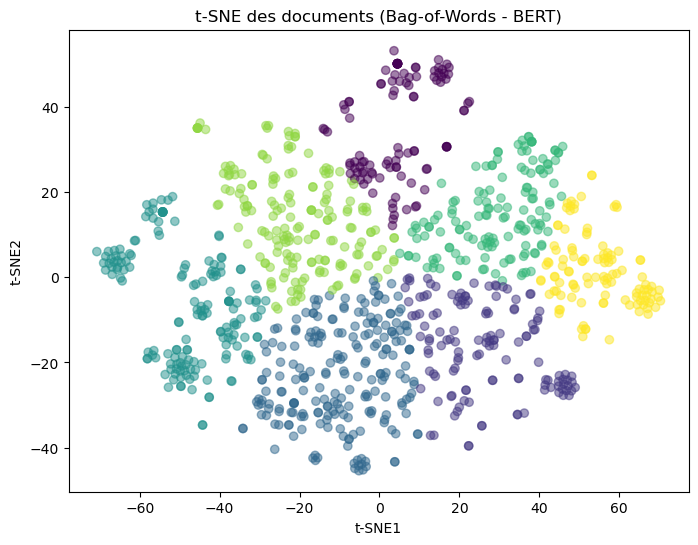

In [119]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_bert'], text_df['TSNE2_bert'], c=text_df['cluster_bert'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - BERT)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [120]:
ari_bert = adjusted_rand_score(text_df['cluster_bert'], text_df['cat_code'])
print(f"ARI = {ari_bert:.3f}")

ARI = 0.117


Le score ARI confirme que cet embedding semble moins bien fonctionner que le If-idf.

### USE

In [121]:
# %pip install -q tensorflow tensorflow-hub
import tensorflow_hub as hub

c:\Users\manon\anaconda3\envs\projet6_env\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [122]:
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#Pour charger le modèle pré-entrainé

In [123]:
#L'appliquer sur nos textes
sentences = text_df['processed_total'].apply(lambda tokens: ' '.join(tokens))
use_embeddings = use_model(sentences.tolist())
use_embeddings = np.array(use_embeddings)

In [124]:
use_df = pd.DataFrame(use_embeddings)
use_df.columns = [f"dim_{i+1}" for i in range(use_df.shape[1])]
use_df.head()

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,...,dim_503,dim_504,dim_505,dim_506,dim_507,dim_508,dim_509,dim_510,dim_511,dim_512
0,-0.053510,-0.054089,0.026092,0.052059,0.013939,0.051436,-0.031803,0.050672,-0.025987,-0.014206,...,-0.044105,-0.054220,-0.053916,0.053606,-0.019908,-0.050709,0.040606,0.048165,0.040521,-0.041709
1,-0.050369,-0.045960,0.031793,0.038707,0.054937,0.058372,0.055156,-0.010368,-0.029582,-0.045791,...,0.034018,-0.058241,-0.054285,-0.054795,-0.043067,-0.051409,-0.028794,0.015582,0.028853,0.030315
2,-0.054069,-0.050712,-0.010966,0.053952,0.052479,0.053578,0.052766,0.045045,-0.050159,0.042655,...,0.051037,-0.054143,-0.051738,-0.012688,0.046266,-0.053518,0.039511,0.051683,-0.034551,-0.048117
3,-0.055002,-0.054782,0.044337,0.053973,0.055028,0.034592,0.022161,0.036333,0.011445,-0.051174,...,-0.036360,-0.055070,-0.021836,0.050440,-0.045662,-0.052857,0.053735,0.053591,-0.008510,-0.051439
4,-0.052788,-0.052264,0.047750,0.051176,0.052853,0.050585,-0.004458,0.041824,0.011946,-0.041859,...,-0.010188,-0.052870,-0.049467,0.036786,-0.052435,-0.051798,0.052632,0.052770,-0.040785,-0.052058


In [125]:
pca_use = PCA(n_components=0.99)
pca_result_use = pca_use.fit_transform(use_df)
print("Variance expliquée :", pca_use.explained_variance_ratio_)
print("Variance expliquée cumulée :", pca_use.explained_variance_ratio_.sum())

Variance expliquée : [0.11724193 0.05738763 0.04883815 0.03820304 0.02510808 0.02401982
 0.02183843 0.01875117 0.01770086 0.01670666 0.01478177 0.0143604
 0.01366279 0.01290325 0.01181179 0.01133392 0.01065311 0.01024898
 0.00978663 0.00953744 0.00927012 0.00923667 0.00896023 0.00860191
 0.00809182 0.00768403 0.00751617 0.00717785 0.00709208 0.00685352
 0.00648871 0.00646917 0.00638506 0.00620567 0.00602009 0.00586282
 0.0057567  0.00556307 0.00552545 0.00535921 0.00531085 0.00514424
 0.00494444 0.00492379 0.00481261 0.00472563 0.00460944 0.00453958
 0.00447072 0.00441732 0.00431806 0.00425821 0.00420024 0.00414159
 0.00412079 0.00396136 0.00391259 0.00385425 0.0037937  0.00374817
 0.00362641 0.00360948 0.00351304 0.00348996 0.00339425 0.00333196
 0.00327205 0.00323307 0.00320783 0.00312016 0.00310652 0.00304091
 0.00298135 0.00291522 0.0029051  0.00284894 0.0028     0.00276899
 0.00271456 0.00267225 0.00262613 0.00261087 0.00259189 0.00255245
 0.00246407 0.00245967 0.00241753 0.002359

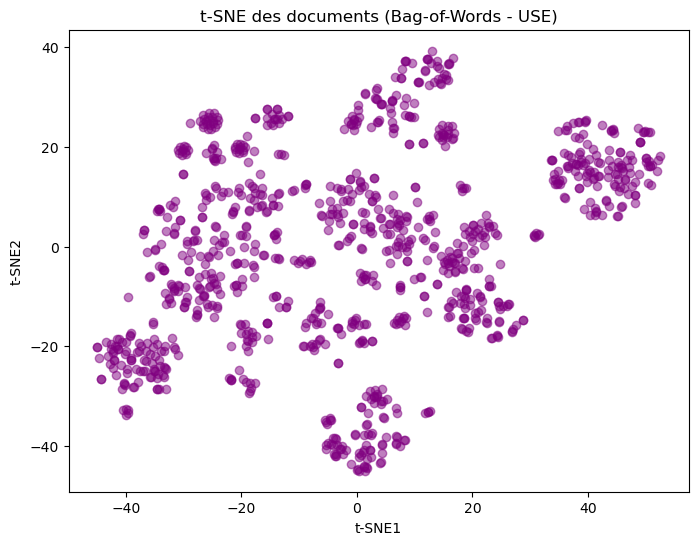

In [126]:
tsne_use = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=30)
tsne_result_use = tsne_use.fit_transform(pca_result_use)

text_df['TSNE1_use'] = tsne_result_use[:, 0]
text_df['TSNE2_use'] = tsne_result_use[:, 1]

plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_use'], text_df['TSNE2_use'], c='purple', alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - USE)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

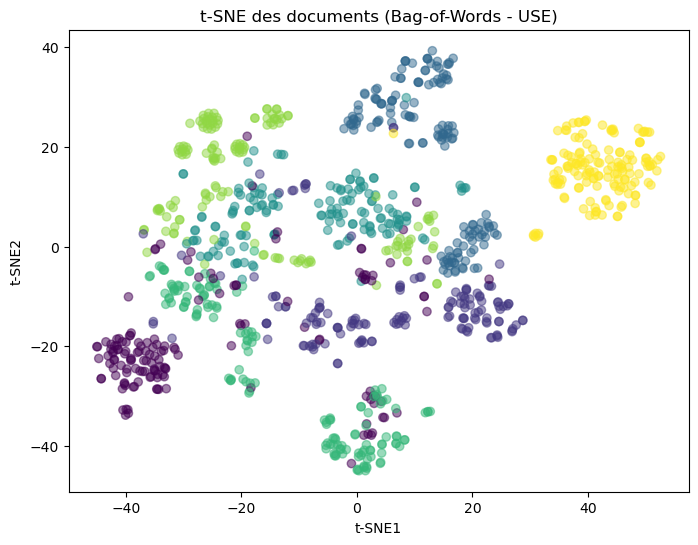

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_use'], text_df['TSNE2_use'], c=text_df['cat_code'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - USE)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [128]:
#Je vais essayer de former des clusters cohérents avec KMeans sur cette représentation t-SNE
kmeans_use = KMeans(n_clusters=7, random_state=42)
kmeans_use.fit(tsne_result_use)
text_df['cluster_use'] = kmeans_use.labels_

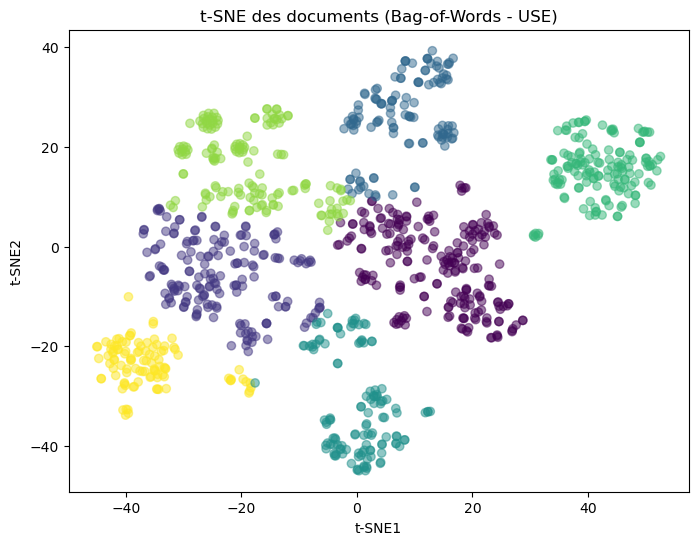

In [129]:
plt.figure(figsize=(8,6))
plt.scatter(text_df['TSNE1_use'], text_df['TSNE2_use'], c=text_df['cluster_use'], alpha=0.5)
plt.title('t-SNE des documents (Bag-of-Words - USE)')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

In [130]:
ari_use = adjusted_rand_score(text_df['cluster_use'], text_df['cat_code'])
print(f"ARI = {ari_use:.3f}")

ARI = 0.390


Cet embedding semble moins bien fonctionner que le Tf-idf.